In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dftools

Welcome to JupyROOT 6.18/00


In [10]:
plt.style.use("cms")
plt.rcParams.update({"font.size": 10})

In [11]:
df = pd.read_csv("electron_trigger_v2.txt", sep='\s+')
df.head(10)

,pt_low,pt_high,eta_low,eta_high,correction,unc_up,unc_down
0,20.0,25.0,0.0,0.8000,0.411053,1.364248e-03,1.364248e-03
1,25.0,30.0,0.0,0.8000,0.653261,8.439484e-09,8.439484e-09
2,30.0,35.0,0.0,0.8000,0.800633,7.432803e-10,7.432803e-10
3,35.0,40.0,0.0,0.8000,0.910912,2.300676e-09,2.300676e-09
4,40.0,50.0,0.0,0.8000,0.921318,4.888292e-07,4.888292e-07
5,50.0,100.0,0.0,0.8000,0.941927,2.737591e-04,2.737591e-04
6,100.0,200.0,0.0,0.8000,0.968013,1.022868e-03,1.022868e-03
7,20.0,25.0,0.8,1.4442,0.373527,1.632556e-03,1.632556e-03
8,25.0,30.0,0.8,1.4442,0.656688,1.107737e-03,1.107737e-03
9,30.0,35.0,0.8,1.4442,0.845151,6.104323e-04,6.104323e-04


In [12]:
pt_low, pt_high, eta_low, eta_high = map(lambda x: x.unique(), [df["pt_low"], df["pt_high"], df["eta_low"], df["eta_high"]])
pt_bins = np.array(list(pt_low)+[pt_high[-1]])
eta_bins = np.array(list(eta_low)+[eta_high[-1]])

In [13]:
#pd.pivot_table(df, index="pt_low", columns="eta_low", values="correction")

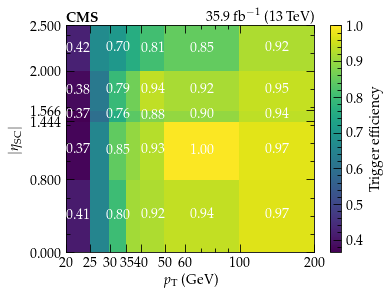

In [16]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=100)

dftools.draw.cms_label(ax, "") #, 'Preliminary')

xbins = pt_bins
ybins = eta_bins
ax.set_xscale('log')
ax.set_xlim(xbins.min(), xbins.max())
ax.set_ylim(ybins.min(), ybins.max())
ax.set_xlabel(r'$p_{\mathrm{T}}$ (GeV)')
ax.set_ylabel(r'$|\eta_{\mathrm{SC}}|$')

hist, _, _, im = ax.hist2d(
    df["pt_low"], df["eta_low"],
    bins = (xbins, ybins),
    weights = df["correction"],
)

from matplotlib.ticker import ScalarFormatter
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([20, 25, 30, 35, 40, 50, 60, 100, 200])
ax.set_yticks(ybins)

for i in range(len(xbins)-1):
    for j in range(len(ybins)-1):
        if i not in [1, 3]:
            ax.text(
                np.sqrt(xbins[i]*xbins[i+1]), (ybins[j]+ybins[j+1])/2.,
                "{:.2f}".format(hist[i,j]),
                ha='center', va='center', color="white",
                fontsize=10,
            )
        
im.set_clim(None, 1.)
cbar = fig.colorbar(im, ax=ax)
#cbar.set_label(r'$\mathtt{Ele27\_WPTight\_Gsf}$ Efficiency')
cbar.set_label(r'Trigger efficiency')
fig.savefig("electron_trigger_efficiency.pdf", format='pdf', bbox_inches='tight')